# SVM for classification, without and with kernels

In this notebook we are going to explore the use of Support Vector Machines (SVMs) for image classification. We are going to use the famous MNIST dataset, that is a dataset of handwritten digits. We get the data from mldata.org, that is a public repository for machine learning data.

The dataset consists of 70,000 images of handwritten digits (i.e., 0, 1, ... 9). Each image is 28 pixels by 28 pixels and we can think of it as a vector of 28x28 = 784 numbers. Each number is an integer between 0 and 255. For each image we have the corresponding label (i.e., 0, 1, ..., 9).

In [11]:
#load the required packages

%matplotlib inline  

import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml#fetch_mldata

In [12]:
#fix your ID ("numero di matricola") and the seed for random generator
ID = 1231829# COMPLETE
np.random.seed(ID)

Now let's load the dataset. 'data' contains the input, 'target' contains the label. We normalize the data by dividing each value by 255 so that each value is in [0,1]

In [13]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
mnist = fetch_openml('mnist_784')#fetch_mldata("MNIST original") #fetch_mldata gives me a deprecated warning and returns an error which fails the execution. Followed these links to fix the issue: https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html  https://www.openml.org/d/554
# rescale the data
X, y = mnist.data / 255., mnist.target

Now split into training and test. We keep 500 samples in the training set. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

**IMPORTANT**: if you cannot run the SVM with 500 samples or 1000 samples (see below), try with a smaller number of samples (e.g. 200 here and 400 below).

In [14]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts = True)

Labels and frequencies in training dataset: 


(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([46, 51, 46, 63, 38, 59, 50, 50, 56, 41]))

We now provide a function to print an image in a dataset, the corresponding true label, and the index of the image in the dataset.

In [15]:
#function for plotting a digit and printing the corresponding labe
def plot_digit(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    #print("LABEL: %i"%labels[index])
    print("LABEL: " + labels[index])
    return

As an example, let's print the 100-th image in X_train and the 40,000-th image in X_test and their true labels.

INPUT:


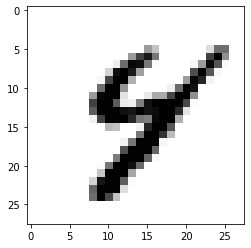

LABEL: 4
INPUT:


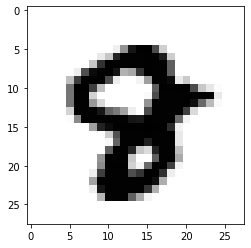

LABEL: 8


In [16]:
#let's try the plotting function
plot_digit(X_train,y_train,100)
plot_digit(X_test,y_test,40000)

## TO DO 1
Run SVM with cross validation to pick a kernel and values of parameters. Use a 5-fold cross-validation to pick the best kernel and choice of parameters. We provide some potential choice for parameters, but change the grid if needed (e.g., it takes too long). For the SVM for classification use SVC from sklearn.svm; for the grid search we suggest you use GridSearchCV from sklearn.model_selection, but you can implement your own cross-validation for model selection if you prefer.

Print the best parameters used as well as the score obtained by the best model

In [17]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [1, 10, 100]}

#run linear SVM
linear_SVM = SVC(kernel='linear')

#find best model using 5-fold CV 
#and train it using all the training data

# ADD CODE
grid_search = GridSearchCV(estimator = linear_SVM, param_grid = parameters, cv = 5) #documentation says that cv's default value is 5. But I prefer to explicite it
grid_res = grid_search.fit(X_train, y_train)
best_params = grid_res.best_params_

print ('RESULTS FOR LINEAR KERNEL\n')

print("Best parameters set found:")
# ADD CODE
print(best_params)

print("Score with best parameters:")
# ADD CODE
score = grid_search.best_score_
print(score)

print("\nAll scores on the grid:")
# ADD CODE
grid_score = grid_search.cv_results_
print(grid_score['split0_test_score'])
print(grid_score['split1_test_score'])
print(grid_score['split2_test_score'])
print(grid_score['split3_test_score'])
print(grid_score['split4_test_score'])
print(grid_score['mean_test_score'])

# parameters for poly with degree 2 kernel
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with poly of degree 2 kernel
poly2_SVM = SVC(kernel='poly',degree=2)

# ADD CODE: DO THE SAME AS ABOVE FOR POLYNOMIAL KERNEL WITH DEGREE=2
grid_search = GridSearchCV(estimator = poly2_SVM, param_grid = parameters, cv = 5) #documentation says that cv's default value is 5. But I prefer to explicite it
grid_res = grid_search.fit(X_train, y_train)
best_params = grid_res.best_params_

print ('\nRESULTS FOR POLY DEGREE=2 KERNEL\n')

print("Best parameters set found:")
# ADD CODE
print(best_params)

print("Score with best parameters:")
# ADD CODE
score = grid_search.best_score_
print(score)

print("\nAll scores on the grid:")
# ADD CODE
grid_score = grid_search.cv_results_
print(grid_score['split0_test_score'])
print(grid_score['split1_test_score'])
print(grid_score['split2_test_score'])
print(grid_score['split3_test_score'])
print(grid_score['split4_test_score'])
print(grid_score['mean_test_score'])

# parameters for rbf SVM
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with rbf kernel
rbf_SVM = SVC(kernel='rbf')
# ADD CODE: DO THE SAME AS ABOVE FOR RBF KERNEL
grid_search = GridSearchCV(estimator = rbf_SVM, param_grid = parameters, cv = 5) #documentation says that cv's default value is 5. But I prefer to explicite it
grid_res = grid_search.fit(X_train, y_train)
best_params = grid_res.best_params_

print ('\nRESULTS FOR rbf KERNEL\n')

print("Best parameters set found:")
# ADD CODE
print(best_params)

print("Score with best parameters:")
# ADD CODE
score = grid_search.best_score_
print(score)

print("\nAll scores on the grid:")
# ADD CODE
grid_score = grid_search.cv_results_
print(grid_score['split0_test_score'])
print(grid_score['split1_test_score'])
print(grid_score['split2_test_score'])
print(grid_score['split3_test_score'])
print(grid_score['split4_test_score'])
print(grid_score['mean_test_score'])

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RESULTS FOR LINEAR KERNEL

Best parameters set found:
{'C': 1}
Score with best parameters:
0.884

All scores on the grid:
[0.85714286 0.85714286 0.85714286]
[0.86 0.86 0.86]
[0.88 0.88 0.88]
[0.89795918 0.89795918 0.89795918]
[0.92783505 0.92783505 0.92783505]
[0.884 0.884 0.884]


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



RESULTS FOR POLY DEGREE=2 KERNEL

Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.88

All scores on the grid:
[0.82857143 0.83809524 0.83809524 0.83809524 0.83809524 0.83809524
 0.83809524 0.83809524 0.83809524]
[0.84 0.86 0.86 0.87 0.86 0.86 0.86 0.86 0.86]
[0.84 0.89 0.89 0.89 0.89 0.89 0.89 0.89 0.89]
[0.83673469 0.8877551  0.8877551  0.8877551  0.8877551  0.8877551
 0.8877551  0.8877551  0.8877551 ]
[0.84536082 0.91752577 0.91752577 0.91752577 0.91752577 0.91752577
 0.91752577 0.91752577 0.91752577]
[0.838 0.878 0.878 0.88  0.878 0.878 0.878 0.878 0.878]


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



RESULTS FOR rbf KERNEL

Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.898

All scores on the grid:
[0.87619048 0.33333333 0.12380952 0.8952381  0.42857143 0.12380952
 0.8952381  0.42857143 0.12380952]
[0.9  0.41 0.13 0.87 0.47 0.13 0.87 0.47 0.13]
[0.88 0.44 0.13 0.91 0.49 0.13 0.91 0.49 0.13]
[0.87755102 0.31632653 0.12244898 0.8877551  0.3877551  0.12244898
 0.8877551  0.3877551  0.12244898]
[0.90721649 0.40206186 0.12371134 0.92783505 0.45360825 0.12371134
 0.92783505 0.45360825 0.12371134]
[0.888 0.38  0.126 0.898 0.446 0.126 0.898 0.446 0.126]


## TO DO 2
For the "best" SVM kernel and choice of parameters from above, train the model on the entire training set and measure the training error. Also make predictions on the test set and measure the test error. Print the training and the test error.

In [18]:
#get training and test error for the best SVM model from CV
best_SVM = rbf_SVM# ADD CODE

# fit the model on the entire training set
# ADD CODE
best_SVM.set_params(**{'C': 10, 'gamma': 0.01})
best_SVM.fit(X_train, y_train)

#get the training and test error
training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.098144


## Use logistic regression for comparison

## TO DO 3

Just for comparison let's also use logistic regression, first with the default values of the parameter for regularization and then with cross-validation to fix the value of the parameter. For cross validation, use 5-fold cross validation and the default values of the regularization parameters for the function linear_model.LogisticRegressionCV(...)

In [19]:
from sklearn import linear_model

lr = linear_model.LogisticRegression()
# fit the model on the training data
# ADD CODE
lr.fit(X_train, y_train)

#compute training and test error for model above
training_error = 1. - lr.score(X_train,y_train)# COMPLETE
test_error = 1. - lr.score(X_test,y_test)# COMPLETE

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

#logistic regression with 5-fold CV: you can use use linear_model.LogisticRegressionCV
# use 5-fold CV to find the best choice of the parameter, than train
# the model on the entire training set
lr_cv = linear_model.LogisticRegressionCV(cv = 5).fit(X_train, y_train)# COMPLETE
training_error_cv = 1. - lr_cv.score(X_train, y_train)# COMPLETE
test_error_cv = 1. - lr_cv.score(X_test, y_test)# COMPLETE

print ("Best logistic regression training error: %f" % training_error_cv)
print ("Best logistic regression test error: %f" % test_error_cv)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best logistic regression training error: 0.000000
Best logistic regression test error: 0.148489


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Best logistic regression training error: 0.000000
Best logistic regression test error: 0.156144


## TO DO 4 
Compare and comment the results from SVM and logistic regression.

What I observe is that both methods have training error equals to 0. This means that the model fitted very well the training set. This can be a synthom of overfitting though. Fortunately this is not the case. The test error with SVM is close to 0 i.e. 9%, which means that SVM learned well and is able to generalize the input data. 
Logistic regression has an higher test error (i.e. 15%) than SVM and the training error is also 0%. In this case should be natural to choose the SVM model just checking the corresponding test errors. However the amount of memory taken and the computational power between these models could be significally different and it could be possible to prefer the logistic regression even though it's test error is higher. 

## TO DO 5
Write the code that finds and plots a digit that is missclassified by logistic regression (optimized for the regularization parameter) and correctly classified by the "best" SVM.

Log reg predicted 8
INPUT:


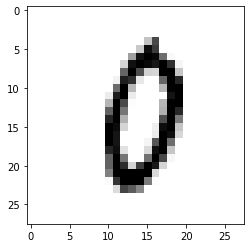

LABEL: 0


In [20]:
# ADD CODE

y_pred_svm = best_SVM.predict(X_test)
y_pred_logreg = lr.predict(X_test)

for i in range(len(y_test)):
    if (y_pred_svm[i] == y_test[i]) and (y_pred_logreg[i] != y_test[i]):
        
        print("Log reg predicted " + str(y_pred_logreg[i]))
        plot_digit(X_test,y_test, i)
        break

## More data
Now let's do the same but using 1000 data points for training. 

## TO DO 6
Repeat the entire analysis above using 1000 samples. Of course you can copy the code from above.

Labels and frequencies in training dataset: 
RESULTS FOR LINEAR KERNEL

Best parameters set found:
{'C': 1}
Score with best parameters:
0.872

All scores on the grid:
[0.87192118 0.87192118 0.87192118]
[0.87064677 0.87064677 0.87064677]
[0.89054726 0.89054726 0.89054726]
[0.8241206 0.8241206 0.8241206]
[0.90306122 0.90306122 0.90306122]
[0.872 0.872 0.872]

RESULTS FOR POLY DEGREE=2 KERNEL

Best parameters set found:
{'C': 1, 'gamma': 0.1}
Score with best parameters:
0.893

All scores on the grid:
[0.85714286 0.88669951 0.88669951 0.88669951 0.88669951 0.88669951
 0.88669951 0.88669951 0.88669951]
[0.88557214 0.88059701 0.88059701 0.88059701 0.88059701 0.88059701
 0.88059701 0.88059701 0.88059701]
[0.89552239 0.92537313 0.92537313 0.92039801 0.92537313 0.92537313
 0.92537313 0.92537313 0.92537313]
[0.83919598 0.83417085 0.83417085 0.83919598 0.83417085 0.83417085
 0.83417085 0.83417085 0.83417085]
[0.89795918 0.93877551 0.93877551 0.93877551 0.93877551 0.93877551
 0.93877551 0.93877551

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



RESULTS FOR rbf KERNEL

Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.91

All scores on the grid:
[0.89162562 0.60591133 0.1182266  0.89162562 0.64039409 0.1182266
 0.89162562 0.64039409 0.1182266 ]
[0.88059701 0.58208955 0.11442786 0.90547264 0.60696517 0.11442786
 0.90547264 0.60696517 0.11442786]
[0.92537313 0.61691542 0.11442786 0.94527363 0.6318408  0.11442786
 0.94527363 0.6318408  0.11442786]
[0.87939698 0.60301508 0.11557789 0.87939698 0.64321608 0.11557789
 0.87939698 0.64321608 0.11557789]
[0.90816327 0.57653061 0.18877551 0.92857143 0.61734694 0.18877551
 0.92857143 0.61734694 0.18877551]
[0.897 0.597 0.13  0.91  0.628 0.13  0.91  0.628 0.13 ]
Best SVM training error: 0.000000
Best SVM test error: 0.079348


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best logistic regression training error: 0.004000
Best logistic regression test error: 0.135884


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs f

Best logistic regression training error: 0.016000
Best logistic regression test error: 0.137768
Log reg predicted 4
INPUT:


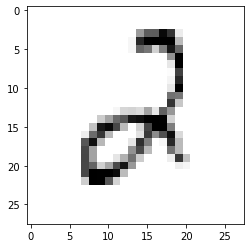

LABEL: 2


In [21]:
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 1000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts = True)

# parameters for linear SVM
parameters = {'C': [1, 10, 100]}

#run linear SVM
linear_SVM = SVC(kernel='linear')

#find best model using 5-fold CV 
#and train it using all the training data

# ADD CODE
grid_search = GridSearchCV(estimator = linear_SVM, param_grid = parameters, cv = 5) #documentation says that cv's default value is 5. But I prefer to explicite it
grid_res = grid_search.fit(X_train, y_train)
best_params = grid_res.best_params_

print ('RESULTS FOR LINEAR KERNEL\n')

print("Best parameters set found:")
# ADD CODE
print(best_params)

print("Score with best parameters:")
# ADD CODE
score = grid_search.best_score_
print(score)

print("\nAll scores on the grid:")
# ADD CODE
grid_score = grid_search.cv_results_
print(grid_score['split0_test_score'])
print(grid_score['split1_test_score'])
print(grid_score['split2_test_score'])
print(grid_score['split3_test_score'])
print(grid_score['split4_test_score'])
print(grid_score['mean_test_score'])

# parameters for poly with degree 2 kernel
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with poly of degree 2 kernel
poly2_SVM = SVC(kernel='poly',degree=2)

# ADD CODE: DO THE SAME AS ABOVE FOR POLYNOMIAL KERNEL WITH DEGREE=2
grid_search = GridSearchCV(estimator = poly2_SVM, param_grid = parameters, cv = 5) #documentation says that cv's default value is 5. But I prefer to explicite it
grid_res = grid_search.fit(X_train, y_train)
best_params = grid_res.best_params_

print ('\nRESULTS FOR POLY DEGREE=2 KERNEL\n')

print("Best parameters set found:")
# ADD CODE
print(best_params)

print("Score with best parameters:")
# ADD CODE
score = grid_search.best_score_
print(score)

print("\nAll scores on the grid:")
# ADD CODE
grid_score = grid_search.cv_results_
print(grid_score['split0_test_score'])
print(grid_score['split1_test_score'])
print(grid_score['split2_test_score'])
print(grid_score['split3_test_score'])
print(grid_score['split4_test_score'])
print(grid_score['mean_test_score'])

# parameters for rbf SVM
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with rbf kernel
rbf_SVM = SVC(kernel='rbf')
# ADD CODE: DO THE SAME AS ABOVE FOR RBF KERNEL
grid_search = GridSearchCV(estimator = rbf_SVM, param_grid = parameters, cv = 5) #documentation says that cv's default value is 5. But I prefer to explicite it
grid_res = grid_search.fit(X_train, y_train)
best_params = grid_res.best_params_

print ('\nRESULTS FOR rbf KERNEL\n')

print("Best parameters set found:")
# ADD CODE
print(best_params)

print("Score with best parameters:")
# ADD CODE
score = grid_search.best_score_
print(score)

print("\nAll scores on the grid:")
# ADD CODE
grid_score = grid_search.cv_results_
print(grid_score['split0_test_score'])
print(grid_score['split1_test_score'])
print(grid_score['split2_test_score'])
print(grid_score['split3_test_score'])
print(grid_score['split4_test_score'])
print(grid_score['mean_test_score'])

best_SVM = rbf_SVM# ADD CODE

# fit the model on the entire training set
# ADD CODE
best_SVM.set_params(**{'C': 10, 'gamma': 0.01})
best_SVM.fit(X_train, y_train)

#get the training and test error
training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

lr = linear_model.LogisticRegression()
# fit the model on the training data
# ADD CODE
lr.fit(X_train, y_train)

#compute training and test error for model above
training_error = 1. - lr.score(X_train,y_train)# COMPLETE
test_error = 1. - lr.score(X_test,y_test)# COMPLETE

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

#logistic regression with 5-fold CV: you can use use linear_model.LogisticRegressionCV
# use 5-fold CV to find the best choice of the parameter, than train
# the model on the entire training set
lr_cv = linear_model.LogisticRegressionCV(cv = 5).fit(X_train, y_train)# COMPLETE
training_error_cv = 1. - lr_cv.score(X_train, y_train)# COMPLETE
test_error_cv = 1. - lr_cv.score(X_test, y_test)# COMPLETE

print ("Best logistic regression training error: %f" % training_error_cv)
print ("Best logistic regression test error: %f" % test_error_cv)

y_pred_svm = best_SVM.predict(X_test)
y_pred_logreg = lr.predict(X_test)
        
for i in range(len(y_test)):
    if (y_pred_svm[i] == y_test[i]) and (y_pred_logreg[i] != y_test[i]):
        #print("True value: " + str(y_test[i]))
        print("Log reg predicted " + str(y_pred_logreg[i]))
        plot_digit(X_test,y_test, i)
        break

## TO DO 7
Compare and comment on the differences with the results above.


The SVM method here improves. It goes from 9% to 7% of the test error. The training error remains 0% as before. 
The intersting thing that happens is that the logistic regression gets worse even with trainin error. What I suppose is logistic regression gets worse when adding more training data in the dataset. The error will not encrease too much, but the difference between SVM becomes significant. Probably the increasing further the training set will reduce the SVM's training/test error. Defnitely SVM becomes to be a better choice over logistic regression. The way to reduce the error is therefore increase the training set but not indefinitely. Memory and computational power will also grow. A tradeoff between the test error and the time to compute the training must be taken into consideration.  